# Arvores de Decisão - Avaliação de Carros

### Disponível em https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Attribute Information:<br>

Class Values: 
unacc, acc, good, vgood 

Attributes: 

buying: vhigh, high, med, low.<br>
maint: vhigh, high, med, low. <br>
doors: 2, 3, 4, 5more. <br>
persons: 2, 4, more. <br>
lug_boot: small, med, big. <br>
safety: low, med, high. <br>
 <br>   
Number of Instances: 1728

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car.data")
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class"]
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
len(df)

1727

In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,4,more,big,high,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
buying      1727 non-null object
maint       1727 non-null object
doors       1727 non-null object
persons     1727 non-null object
lug_boot    1727 non-null object
safety      1727 non-null object
Class       1727 non-null object
dtypes: object(7)
memory usage: 94.5+ KB


### limpeza dos dados missing

In [6]:
df2 = df.dropna()
len(df2)

1727

In [7]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [9]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

car_data = df2.loc[:,["buying", "maint", "doors", "persons", "lug_boot", "safety"]]
car_target = df2["Class"]

In [10]:
car_data[:3]

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low


In [11]:
car_target[:3]

0    unacc
1    unacc
2    unacc
Name: Class, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    car_data, car_target, stratify=car_target, random_state=42)

X_train[:3]

,buying,maint,doors,persons,lug_boot,safety
877,med,vhigh,2,4,med,high
1478,low,high,4,more,med,low
1401,low,vhigh,5more,more,big,med


## conversao de categorias para inteiros

Class Values: <br>
unacc, acc, good, vgood (de Não-aceitável até Muito Bom)<br>
<br>
Attributes: <br>
buying: vhigh, high, med, low. <br>
maint: vhigh, high, med, low.<br> 
doors: 2, 3, 4, 5more. <br>
persons: 2, 4, more.   <br>
lug_boot: small, med, big. <br>
safety: low, med, high.

In [18]:
# codifica todo o dataframe para numérico
from sklearn.preprocessing import LabelEncoder
def codificar_dataframe(df):
    le = LabelEncoder()
    df2 = pd.DataFrame()
    for col in df.columns.values:
        # Encoding only categorical variables
        #print(len(df2[col]))
        if df[col].dtypes=='object':
            data=df[col]
            le.fit(data.values)
            #print (data.values)
            #print(le.fit(data.values))
            df2[col]=le.transform(df[col])           
            
    # gerar os dicionarios das categorias e dos inteiros
    dict_scalar ={}
    dict_to_string = {}
    d = {}
    columns = df.columns.values.tolist()
    #print(type(columns))
    #print(columns)
    for col in columns:
        #print(col)
        values = list(set(df[col]))
        #print (values)
        le = LabelEncoder()
        vt = le.fit_transform(values)
        #print(le.transform(values))
        dict_scalar[col] = {}
        dict_to_string[col] = {}
        d = {}
        ds = {}
        for v, vt in zip(values, vt): 
            #print (v,vt)
            d[v] = vt
            ds[vt] = v
        dict_scalar[col] = d
        dict_to_string[col] = ds
        
    return(df2, dict_scalar, dict_to_string)

In [19]:
# codifica dados categoricos para inteiros
df_cod, dict_nomes, dict_int = codificar_dataframe(df)
df_cod.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [22]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class"]
car_data_cod = df_cod.loc[:, ["buying", "maint", "doors", "persons", "lug_boot", "safety"]]
car_target_cod = df_cod["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    car_data_cod, car_target_cod, stratify=car_target, random_state=42)

X_train[:3]

,buying,maint,doors,persons,lug_boot,safety
877,2,3,0,1,1,0
1478,1,0,2,2,1,1
1401,1,3,3,2,0,2


In [15]:
from sklearn.preprocessing import LabelEncoder

le_buying = LabelEncoder()
le_buying.fit(["vhigh", "high", "med", "low"])
print(le_buying.transform(["vhigh", "high", "med", "low"]))
print(list(le_buying.inverse_transform([3, 0, 2, 1])))

le_maint = LabelEncoder()
le_maint.fit(["vhigh", "high", "med", "low"])
print(le_maint.transform(["vhigh", "high", "med", "low"]))
print(list(le_maint.inverse_transform([3, 0, 2, 1])))

le_doors = LabelEncoder()
le_doors.fit(["2", "3", "4", "5more"])
print(le_doors.transform(["2", "3", "4", "5more"]))
print(list(le_doors.inverse_transform([3, 0, 2, 1])))

le_persons = LabelEncoder()
le_persons.fit(["2", "4", "more"])
print(le_persons.transform(["2", "4", "more"]))
print(list(le_persons.inverse_transform([0, 2, 1])))

le_lug_boot = LabelEncoder()
le_lug_boot.fit(["small", "med", "big"])
print(le_lug_boot.transform(["small", "med", "big"]))
print(list(le_lug_boot.inverse_transform([0, 2, 1])))

le_safety = LabelEncoder()
le_safety.fit(["low", "med", "high"])
print(le_safety.transform(["low", "med", "high"]))
print(list(le_safety.inverse_transform([0, 2, 1])))

le_class = LabelEncoder()
le_class.fit(["unacc", "acc", "good", "vgood"])
print(le_class.transform(["unacc", "acc", "good", "vgood"]))
print(list(le_class.inverse_transform([0, 2, 1, 3])))

[3 0 2 1]
['vhigh', 'high', 'med', 'low']
[3 0 2 1]
['vhigh', 'high', 'med', 'low']
[0 1 2 3]
['5more', '2', '4', '3']
[0 1 2]
['2', 'more', '4']
[2 1 0]
['big', 'small', 'med']
[1 2 0]
['high', 'med', 'low']
[2 0 1 3]
['acc', 'unacc', 'good', 'vgood']


### aplicar o algoritmo de arvores de decisao

In [23]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.991


### Previsao

In [24]:
import numpy as np

In [25]:
# [2 0 1 3]
#['acc', 'unacc', 'good', 'vgood']

carro = [
#buying maint doors  persons lug_boot safety 
    2,  1,     1   ,    2,    2,        1
]
carro1 = np.array(carro).reshape(1, -1) 
print(tree.predict(carro1))

[2]


In [ ]:
carro

In [ ]:
Attributes: 
buying: vhigh, high, med, low. 
maint: vhigh, high, med, low. 
doors: 2, 3, 4, 5more. 
persons: 2, 4, more.   
lug_boot: small, med, big. 
safety: low, med, high.

In [ ]:
import numpy as np

In [26]:
carro2 = []
#buying maint doors  persons lug_boot safety 
carro2.append(le_buying.transform(["high"]))
carro2.append(le_maint.transform(["med"]))
carro2.append(le_doors.transform(["4"]))
carro2.append(le_persons.transform(["4"]))
carro2.append(le_lug_boot.transform(["med"]))
carro2.append(le_safety.transform(["med"]))
#carro2
carro3 = np.array(carro2).reshape(1, -1) 
carro3
tree.predict(carro3)[0]

0

In [ ]:
Atributos

buying: vhigh, high, med, low. 
maint: vhigh, high, med, low. 
doors: 2, 3, 4, 5more. 
persons: 2, 4, more.   
lug_boot: small, med, big. 
safety: low, med, high.

In [27]:
carros = [
#buying     maint   doors  persons  lug_boot     safety  
[  "med",  "med",   "2",    "4",      "big",     "high"],
[  "vhigh",  "med",   "3",    "more",  "med",     "med"]    
]

print("buying     maint   doors  persons  lug_boot     safety")
for carro in carros:
    carro2 = []
    carro2.append(le_buying.transform([carro[0]]))
    carro2.append(le_maint.transform([carro[1]]))
    carro2.append(le_doors.transform([carro[2]]))
    carro2.append(le_persons.transform([carro[3]]))
    carro2.append(le_lug_boot.transform([carro[4]]))
    carro2.append(le_safety.transform([carro[5]]))
    #print(carro2)
    carro3 = np.array(carro2).reshape(1, -1) 
    print(carro3)
    print(tree.predict(carro3)[0])

buying     maint   doors  persons  lug_boot     safety
[[2 2 0 1 0 0]]
3
[[3 2 1 2 1 2]]
0


### Atributos mais importantes

Atributos mais relavantes


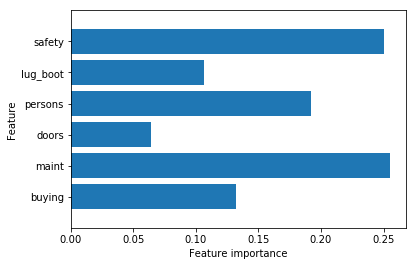

array([ 0.13192115,  0.25503203,  0.06395813,  0.19167667,  0.10664823,
        0.25076379])

In [28]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(model):
    columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
    n_features = len(columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances(tree)
tree.feature_importances_

### Analisando a árvore de decisao

In [29]:
# Class: "unacc", "acc", "good", "vgood"
Class = ["unacc", "acc", "good", "vgood"]
features = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["unacc", "acc", "good", "vgood",],
                feature_names=features, impurity=False, filled=True)

In [ ]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
# http://www.graphviz.org/Download_macos.php
# !pip install graphviz

import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))